### Clustering algorithm for unsupervised classification

In [1]:
import pandas as pd

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Mall_Customers_dataset.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'])

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [9]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [10]:
cluster_number = model.predict(X)

In [11]:
len(cluster_number)

200

In [12]:
c0 = X[cluster_number==0]
c1 = X[cluster_number==1]
c2 = X[cluster_number==2]
c3 = X[cluster_number==3]
c4 = X[cluster_number==4]

In [13]:
plt.scatter(c0['Annual Income (k$)'],c0['Spending Score (1-100)'],c='red')
plt.scatter(c1['Annual Income (k$)'],c1['Spending Score (1-100)'],c='blue')
plt.scatter(c2['Annual Income (k$)'],c2['Spending Score (1-100)'],c='yellow')
plt.scatter(c3['Annual Income (k$)'],c3['Spending Score (1-100)'],c='cyan')
plt.scatter(c4['Annual Income (k$)'],c4['Spending Score (1-100)'],c='green')

In [14]:
model.inertia_

44448.45544793369

In [16]:
WCSS =[]
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    WCSS.append(model.inertia_)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
WCSS

[269981.28000000014,
 182440.30762987016,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37442.24745037571,
 30552.714025467285,
 25012.917069885472,
 21829.135638779822,
 19646.482018947245]

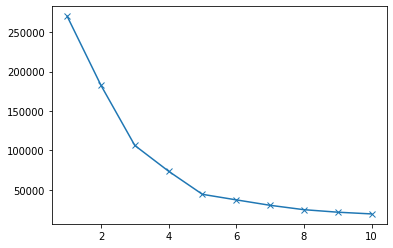

In [20]:
plt.plot(range(1,11),WCSS,marker = 'x')